## ***`HAIR SALON PROJECT`*** 
   ### **`BY:`** 
***`Thompson, Tavleen & Sachin: TTSaloon`***

### `About Dataset / No-Show Prediction`
***`Context:`***
No-shows are a big problem for hair salons the same as airlines and medical facilities. Excessive no-shows increase costs and wait times for businesses and all other customers alike. A No-show prediction service would allow hair salons to select from a variety of treatment options at the time of the booking such as requiring a non-refundable deposit or scheduling the appointment at a different time, location or with a different service provider such that the potential no-show would have less business and customer experience impact.

***`Content:`***
This is a dataset that can be used to predict appointment no-shows. The data includes bookings and cancellation information to determine whether a given booking resulted in a "no-show" wherein the client either didn't show up at all or canceled the appointment within 48 hours of the planned booking (i.e., an out-of-policy cancellation). The data consists primarily of attributes of the appointment booking itself and excludes client details or details on the staff member providing the service.

***`Acknowledgements:`***
The data was used with the permission of an actual hair salon in Toronto, Canada. It covers a time series from March to July of 2018. I will also like to acknowledge ***`FREDERICK FERGUSON`*** who updated this last piece of work on Kaggle.


***`Data Description/Prediction Criteria`***

The main task is to predict the bookings most likely to end up with a no-show. Here we posess the information about the client’s previous bookings, cancelations and no-shows as well as service and cost information.

`book_tod:` The booking time of day.

`book_dow:` The booking day-of-week.

`book_category:` The booked service category (COLOR or STYLE)

`book_staff:` The staff member to provide the service.

`last_day_services:` The number of services provided to the client on their last visit before the current booking or today whichever is greater.

`last_receipt_tot:` The amount paid by the client on their last visit before the current booking or today whichever is greater.

`last_noshow:` Did the client no-show on their last booking before the current booking or today whichever is greater? (0 - no, 1 - yes)

`last_prod_flag:` Did the client buy a retail product on their last booking before the current booking or today whichever is greater? (0 - no, 1 - yes)

`last_cumrev:` The client’s cumulative service revenue as of their last booking before the current booking or today whichever is greater.

`last_cumbook:` The client’s cumulative number of bookings as of their last booking before the current booking or today whichever is greater.

`last_cumstyle:` The client’s cumulative number of STYLE bookings as of their last booking before the current booking or today whichever is greater.

`last_cumcolor:` The client’s cumulative number of COLOR bookings as of their last booking before the current booking or today whichever is greater.

`last_cumprod:` The client’s cumulative number of bookings with retail product purchases as of their last booking before the current booking or today whichever is greater.

`last_cumcancel:` The client’s cumulative number of appointment cancellations as of their last booking before the current booking or today whichever is greater.

`last_cumnoshow:` The client’s cumulative number of no-shows as of their last booking before the current booking or today whichever is greater.


### Import NumPy and Pandas Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Load the Dataset and drops two columns named 'Unnamed: 0' and 'last_tod' from the DataFrame df.

In [4]:
df = pd.read_csv('./hair-salon-no-show-data-set/hair_salon_no_show_wrangled_df.csv')
df = df.drop(['Unnamed: 0','last_tod'],axis=1)
df.head()

,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,afternoon,Wednesday,STYLE,JJ,NaN,NaN,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0
1,morning,Wednesday,COLOR,JOANNE,NaN,NaN,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,0,1,262,2,1,1,2,0,0,0,35
3,afternoon,Thursday,STYLE,KELLY,NaN,NaN,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0
4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,0,0,35,1,1,0,0,0,0,0,9


### Output a DataFrame containing the statistics for all numerical columns in your DataFrame df

In [5]:
df.describe()

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.545082,35.782679,0.076332,0.114242,111.258197,1.906762,1.520492,0.325307,0.487193,0.280225,0.422643,0.114754,14.402152
std,0.658514,59.371877,0.265597,0.318186,207.927702,3.315854,2.756585,0.827646,1.261275,0.853646,1.319786,0.318807,21.079495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,60.000000,0.000000,0.000000,132.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
max,3.000000,382.800000,1.000000,1.000000,1276.000000,20.000000,18.000000,7.000000,11.000000,8.000000,9.000000,1.000000,133.000000


### Understanding the structure of your DataFrame, checking for missing values, and assessing the memory footprint of your data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_tod           1717 non-null   object 
 1   book_dow           1952 non-null   object 
 2   book_category      1952 non-null   object 
 3   book_staff         1952 non-null   object 
 4   last_category      1003 non-null   object 
 5   last_staff         1003 non-null   object 
 6   last_day_services  1952 non-null   int64  
 7   last_receipt_tot   1952 non-null   float64
 8   last_dow           1003 non-null   object 
 9   last_noshow        1952 non-null   int64  
 10  last_prod_flag     1952 non-null   int64  
 11  last_cumrev        1952 non-null   int64  
 12  last_cumbook       1952 non-null   int64  
 13  last_cumstyle      1952 non-null   int64  
 14  last_cumcolor      1952 non-null   int64  
 15  last_cumprod       1952 non-null   int64  
 16  last_cumcancel     1952 

### List of unique values for each column in your DataFrame using for loop to iterates through each column name

In [7]:
for i in df.columns:
    print(i+":",df[i].unique())

book_tod: ['afternoon' 'morning' nan 'evening']
book_dow: ['Wednesday' 'Thursday' 'Saturday' 'Friday' 'Tuesday' 'Sunday' 'Monday']
book_category: ['STYLE' 'COLOR' 'MISC']
book_staff: ['JJ' 'JOANNE' 'KELLY' 'BECKY' 'HOUSE' 'SINEAD' 'TANYA']
last_category: [nan 'COLOR' 'STYLE' 'MISC']
last_staff: [nan 'JOANNE' 'KELLY' 'BECKY' 'HOUSE' 'JJ' 'SINEAD' 'TANYA']
last_day_services: [0 2 1 3]
last_receipt_tot: [  0.   262.    35.    55.    76.   100.4  230.    30.    50.    82.
  40.   119.6   96.6   52.   202.   137.    70.    95.   120.    70.73
 119.8   65.   282.   182.    60.   110.4  154.25  90.   115.   102.
 125.4   80.   170.   195.   250.    83.8  210.    85.   105.    59.4
  75.   210.75 172.73  81.05  32.   160.   100.   190.   122.   245.
 113.5  167.    68.45 242.   132.4   45.   255.55 130.   101.4  220.
 382.8   63.45 135.   225.   172.   215.   199.8  111.4  125.   260.
 339.   108.31 117.39  78.8  180.   182.8  192.    15.   147.   300.
 114.44 228.25 182.73  67.   350.   110.3

### Identifys which numeric features in the dataset are most strongly correlated with the "noshow" column, which can provide insights into potential predictors of no-show appointments.

In [11]:
numeric_df = df.select_dtypes(include=[np.number]) # Select only numeric columns
cancel_corr = numeric_df.corr()["noshow"]
cancel_corr.abs().sort_values(ascending=False)[1:]


last_cumnoshow       0.214799
last_cumrev          0.184577
last_cumstyle        0.174626
last_noshow          0.162844
last_cumbook         0.149282
last_cumcancel       0.136035
recency              0.059878
last_prod_flag       0.023193
last_receipt_tot     0.023062
last_day_services    0.021733
last_cumcolor        0.021623
last_cumprod         0.009090
Name: noshow, dtype: float64

### Generates a heatmap visualization of the correlation matrix for the numeric columns in the DataFrame df. It provides a graphical representation of the correlations between different numeric columns in the DataFrame df, which can help identify patterns and relationships in the data.

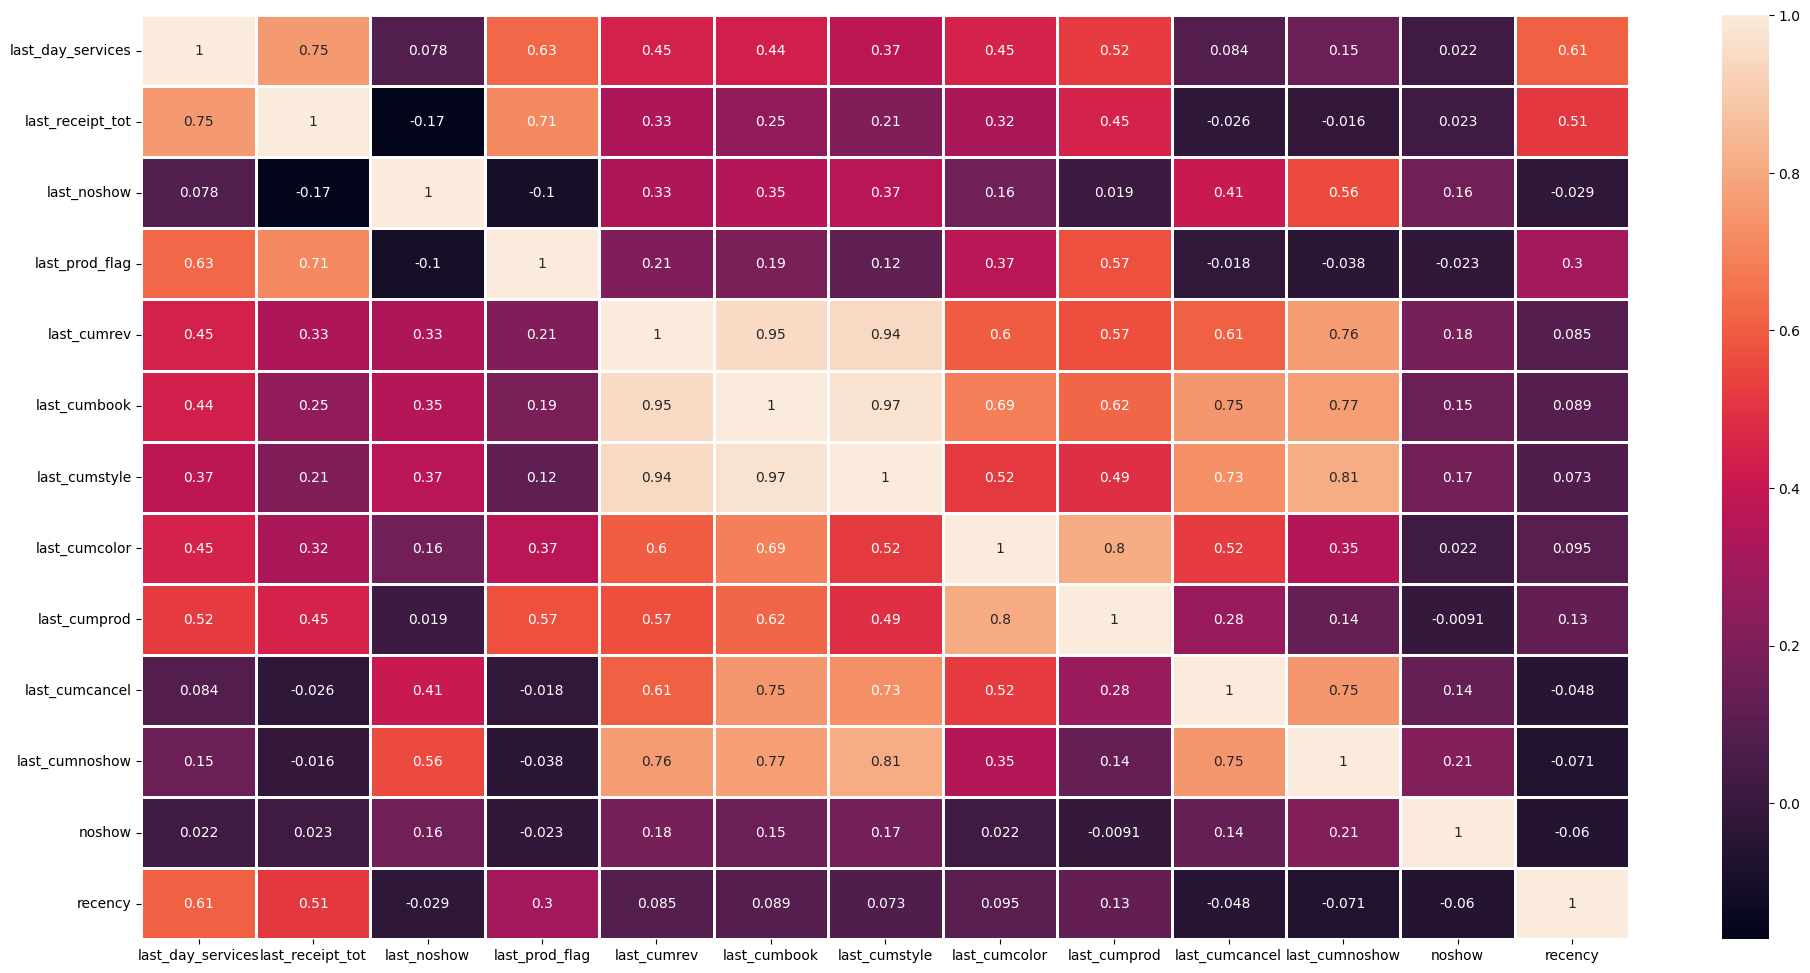

In [13]:
numeric_df = df.select_dtypes(include=[np.number]) # Select only numeric columns
corr = numeric_df.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

### Checks for null values in the DataFrame df and creates a DataFrame named null containing information about the null values

In [14]:
# checking for null values 
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null.sort_values(by=['Null Values'],ascending=False)

,Null Values,Percentage Null Values
last_category,949,48.616803
last_staff,949,48.616803
last_dow,949,48.616803
book_tod,235,12.038934
last_cumbook,0,0.000000
noshow,0,0.000000
last_cumnoshow,0,0.000000
last_cumcancel,0,0.000000
last_cumprod,0,0.000000
last_cumcolor,0,0.000000


### Replacing NaN (missing) values with 0 in specific columns of the DataFrame df. By replacing NaN values with 0, it's assumed that missing values in these columns represent cases where certain categorical information is not available.

In [15]:
df['last_category'] = df['last_category'].replace(np.nan,0)
df['last_staff'] = df['last_staff'].replace(np.nan,0)
df['last_dow'] = df['last_dow'].replace(np.nan,0)
df['book_tod'] = df['book_tod'].replace(np.nan,0)

In [16]:
df

,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,afternoon,Wednesday,STYLE,JJ,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,morning,Wednesday,COLOR,JOANNE,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,0,1,262,2,1,1,2,0,0,0,35
3,afternoon,Thursday,STYLE,KELLY,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,0,0,35,1,1,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,afternoon,Thursday,STYLE,BECKY,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1948,afternoon,Tuesday,STYLE,BECKY,STYLE,BECKY,1,30.0,Thursday,0,0,30,1,1,0,0,0,0,0,40
1949,0,Tuesday,STYLE,BECKY,STYLE,BECKY,1,30.0,Thursday,0,0,30,1,1,0,0,0,0,0,40
1950,afternoon,Tuesday,STYLE,BECKY,STYLE,BECKY,1,50.0,Tuesday,0,0,130,3,3,0,0,1,0,0,28


In [17]:
df.columns

Index(['book_tod', 'book_dow', 'book_category', 'book_staff', 'last_category',
       'last_staff', 'last_day_services', 'last_receipt_tot', 'last_dow',
       'last_noshow', 'last_prod_flag', 'last_cumrev', 'last_cumbook',
       'last_cumstyle', 'last_cumcolor', 'last_cumprod', 'last_cumcancel',
       'last_cumnoshow', 'noshow', 'recency'],
      dtype='object')

In [18]:
cat_features = ['book_tod','book_dow','book_category','book_staff','last_category','last_staff','last_dow']

### Using scikit-learn's LabelEncoder from the preprocessing module to encode categorical variables in the DataFrame df. By using LabelEncoder, categorical variables are transformed into numerical labels, which can be fed into machine learning algorithms that require numerical input

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in cat_features:
    df[i] = df[i].astype('str')
    df[i] = le.fit_transform(df[i])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_tod           1952 non-null   int32  
 1   book_dow           1952 non-null   int32  
 2   book_category      1952 non-null   int32  
 3   book_staff         1952 non-null   int32  
 4   last_category      1952 non-null   int32  
 5   last_staff         1952 non-null   int32  
 6   last_day_services  1952 non-null   int64  
 7   last_receipt_tot   1952 non-null   float64
 8   last_dow           1952 non-null   int32  
 9   last_noshow        1952 non-null   int64  
 10  last_prod_flag     1952 non-null   int64  
 11  last_cumrev        1952 non-null   int64  
 12  last_cumbook       1952 non-null   int64  
 13  last_cumstyle      1952 non-null   int64  
 14  last_cumcolor      1952 non-null   int64  
 15  last_cumprod       1952 non-null   int64  
 16  last_cumcancel     1952 

### Converting the data type of the 'last_receipt_tot' column in the DataFrame df to integer

In [21]:
df['last_receipt_tot'] = df['last_receipt_tot'].astype('int')

### Separating the DataFrame df into feature matrix X and target vector y, where X contains the features (independent variables) and y contains the target variable (dependent variable). By splitting the DataFrame df into feature matrix X and target vector y, we are preparing the data for supervised learning tasks, where X will be used to train the model, and y will be used as the ground truth labels.

In [22]:
X = df.drop(['noshow'], axis=1)
y = df['noshow']
print(X.shape,y.shape)

(1952, 19) (1952,)


### Using scikit-learn's train_test_split function to split the feature matrix X and the target vector y into training and testing sets. These arrays contain subsets of the original data, with 75% used for training and 25% used for testing. This split allows for training the machine learning model on the training set and evaluating its performance on the separate testing set.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,shuffle=True)

## Model Training & Evaluation

### Importing several classifiers from scikit-learn

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

### Training a Logistic Regression classifier (LogisticRegression) using the training data (X_train and y_train), makes predictions on the test data (X_test), and generates a classification report using scikit-learn's classification_report function.

In [24]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       437
           1       0.12      0.04      0.06        51

    accuracy                           0.87       488
   macro avg       0.51      0.50      0.49       488
weighted avg       0.81      0.87      0.84       488



The classification report provides a comprehensive evaluation of the performance of the `Logistic Regression classifier` on the test data. Here's a breakdown of the key metrics:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the classifier.
   - For class 0, the precision is 0.90, indicating that 90% of the appointments predicted as not showing up were correct.
   - For class 1, the precision is 0.12, suggesting that only 12% of the appointments predicted as showing up were correct.

2. **Recall**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - For class 0, the recall is 0.97, indicating that 97% of the actual no-show appointments were correctly predicted by the classifier.
   - For class 1, the recall is 0.04, suggesting that only 4% of the actual showing up appointments were correctly predicted by the classifier.

3. **F1-score**:
   - The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
   - For class 0, the F1-score is 0.93, indicating a good balance between precision and recall for predicting no-show appointments.
   - For class 1, the F1-score is 0.06, suggesting poor performance in predicting showing up appointments due to low precision and recall.

4. **Support**:
   - Support represents the number of actual occurrences of each class in the test dataset.
   - There are 437 instances of class 0 (no-show appointments) and 51 instances of class 1 (showing up appointments) in the test dataset.

5. **Accuracy**:
   - Accuracy measures the overall correctness of the classifier across all classes.
   - The overall accuracy of the classifier is 0.87, indicating that 87% of the appointments were correctly classified.

6. **Macro Avg and Weighted Avg**:
   - Macro avg computes the unweighted mean of precision, recall, and F1-score across all classes, treating each class equally.
   - Weighted avg computes the weighted average of precision, recall, and F1-score across all classes, taking into account the number of instances of each class.
   - The macro avg and weighted avg F1-scores are both low, suggesting that the classifier's performance is significantly impacted by the imbalance in class distribution.

This classification report indicates that the Logistic Regression classifier performs well in predicting no-show appointments (class 0) but struggles to predict showing up appointments (class 1) due to low precision, recall, and F1-score for class 1. 

### Training a K-Nearest Neighbors (KNN) classifier (KNeighborsClassifier) using the training data (X_train and y_train), makes predictions on the test data (X_test), and generates a classification report using scikit-learn's classification_report function.

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

clf_report = classification_report(y_test, y_pred_knn)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       437
           1       0.30      0.14      0.19        51

    accuracy                           0.88       488
   macro avg       0.60      0.55      0.56       488
weighted avg       0.84      0.88      0.86       488



The classification report provides an evaluation of the performance of the `K-Nearest Neighbors (KNN) classifier` on the test data. Here's a breakdown of the key metrics:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the classifier.
   - For class 0, the precision is 0.91, indicating that 91% of the appointments predicted as not showing up were correct.
   - For class 1, the precision is 0.30, suggesting that only 30% of the appointments predicted as showing up were correct.

2. **Recall**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - For class 0, the recall is 0.96, indicating that 96% of the actual no-show appointments were correctly predicted by the classifier.
   - For class 1, the recall is 0.14, suggesting that only 14% of the actual showing up appointments were correctly predicted by the classifier.

3. **F1-score**:
   - The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
   - For class 0, the F1-score is 0.93, indicating a good balance between precision and recall for predicting no-show appointments.
   - For class 1, the F1-score is 0.19, suggesting poor performance in predicting showing up appointments due to low precision and recall.

4. **Support**:
   - Support represents the number of actual occurrences of each class in the test dataset.
   - There are 437 instances of class 0 (no-show appointments) and 51 instances of class 1 (showing up appointments) in the test dataset.

5. **Accuracy**:
   - Accuracy measures the overall correctness of the classifier across all classes.
   - The overall accuracy of the classifier is 0.88, indicating that 88% of the appointments were correctly classified.

6. **Macro Avg and Weighted Avg**:
   - Macro avg computes the unweighted mean of precision, recall, and F1-score across all classes, treating each class equally.
   - Weighted avg computes the weighted average of precision, recall, and F1-score across all classes, taking into account the number of instances of each class.
   - The macro avg and weighted avg F1-scores are lower compared to the Logistic Regression classifier, indicating that the overall performance of the KNN classifier is slightly worse.

The classification report suggests that the KNN classifier performs reasonably well in predicting no-show appointments (class 0) but struggles to predict showing up appointments (class 1) due to low precision, recall, and F1-score for class 1.

### Training a Random Forest classifier (RandomForestClassifier) using the training data (X_train and y_train), makes predictions on the test data (X_test), and generates a classification report using scikit-learn's classification_report function.

In [26]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       437
           1       0.58      0.43      0.49        51

    accuracy                           0.91       488
   macro avg       0.76      0.70      0.72       488
weighted avg       0.90      0.91      0.90       488



The classification report provides an evaluation of the performance of the `Random Forest classifier` on the test data. Here's a breakdown of the key metrics:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the classifier.
   - For class 0, the precision is 0.94, indicating that 94% of the appointments predicted as not showing up were correct.
   - For class 1, the precision is 0.58, suggesting that 58% of the appointments predicted as showing up were correct.

2. **Recall**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - For class 0, the recall is 0.96, indicating that 96% of the actual no-show appointments were correctly predicted by the classifier.
   - For class 1, the recall is 0.43, suggesting that 43% of the actual showing up appointments were correctly predicted by the classifier.

3. **F1-score**:
   - The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
   - For class 0, the F1-score is 0.95, indicating a good balance between precision and recall for predicting no-show appointments.
   - For class 1, the F1-score is 0.49, suggesting moderate performance in predicting showing up appointments.

4. **Support**:
   - Support represents the number of actual occurrences of each class in the test dataset.
   - There are 437 instances of class 0 (no-show appointments) and 51 instances of class 1 (showing up appointments) in the test dataset.

5. **Accuracy**:
   - Accuracy measures the overall correctness of the classifier across all classes.
   - The overall accuracy of the classifier is 0.91, indicating that 91% of the appointments were correctly classified.

6. **Macro Avg and Weighted Avg**:
   - Macro avg computes the unweighted mean of precision, recall, and F1-score across all classes, treating each class equally.
   - Weighted avg computes the weighted average of precision, recall, and F1-score across all classes, taking into account the number of instances of each class.
   - The macro avg and weighted avg F1-scores are higher compared to both Logistic Regression and K-Nearest Neighbors classifiers, indicating that the overall performance of the Random Forest classifier is better.

Overall, the classification report suggests that the Random Forest classifier performs well in predicting no-show appointments (class 0) and shows moderate performance in predicting showing up appointments (class 1).

### Training an AdaBoost classifier (AdaBoostClassifier) using the training data (X_train and y_train), makes predictions on the test data (X_test), and generates a classification report using scikit-learn's classification_report function.

In [27]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       437
           1       0.45      0.35      0.40        51

    accuracy                           0.89       488
   macro avg       0.69      0.65      0.67       488
weighted avg       0.88      0.89      0.88       488



c:\Users\DELL\Desktop\Class\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The classification report provides an evaluation of the performance of the `AdaBoost classifier` on the test data. Here's a breakdown of the key metrics:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the classifier.
   - For class 0, the precision is 0.93, indicating that 93% of the appointments predicted as not showing up were correct.
   - For class 1, the precision is 0.45, suggesting that 45% of the appointments predicted as showing up were correct.

2. **Recall**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - For class 0, the recall is 0.95, indicating that 95% of the actual no-show appointments were correctly predicted by the classifier.
   - For class 1, the recall is 0.35, suggesting that 35% of the actual showing up appointments were correctly predicted by the classifier.

3. **F1-score**:
   - The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
   - For class 0, the F1-score is 0.94, indicating a good balance between precision and recall for predicting no-show appointments.
   - For class 1, the F1-score is 0.40, suggesting moderate performance in predicting showing up appointments.

4. **Support**:
   - Support represents the number of actual occurrences of each class in the test dataset.
   - There are 437 instances of class 0 (no-show appointments) and 51 instances of class 1 (showing up appointments) in the test dataset.

5. **Accuracy**:
   - Accuracy measures the overall correctness of the classifier across all classes.
   - The overall accuracy of the classifier is 0.89, indicating that 89% of the appointments were correctly classified.

6. **Macro Avg and Weighted Avg**:
   - Macro avg computes the unweighted mean of precision, recall, and F1-score across all classes, treating each class equally.
   - Weighted avg computes the weighted average of precision, recall, and F1-score across all classes, taking into account the number of instances of each class.
   - The macro avg and weighted avg F1-scores are lower compared to the Random Forest classifier, indicating that the overall performance of the AdaBoost classifier is slightly worse.

The classification report suggests that the AdaBoost classifier performs well in predicting no-show appointments (class 0) but shows moderate performance in predicting showing up appointments (class 1).

### Training a Gradient Boosting classifier (GradientBoostingClassifier) using the training data (X_train and y_train), makes predictions on the test data (X_test), and generates a classification report using scikit-learn's classification_report function.

In [28]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       437
           1       0.60      0.65      0.62        51

    accuracy                           0.92       488
   macro avg       0.78      0.80      0.79       488
weighted avg       0.92      0.92      0.92       488



The classification report provides an evaluation of the performance of the `Gradient Boosting classifier` on the test data. Here's a breakdown of the key metrics:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the classifier.
   - For class 0, the precision is 0.96, indicating that 96% of the appointments predicted as not showing up were correct.
   - For class 1, the precision is 0.60, suggesting that 60% of the appointments predicted as showing up were correct.

2. **Recall**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - For class 0, the recall is 0.95, indicating that 95% of the actual no-show appointments were correctly predicted by the classifier.
   - For class 1, the recall is 0.65, suggesting that 65% of the actual showing up appointments were correctly predicted by the classifier.

3. **F1-score**:
   - The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
   - For class 0, the F1-score is 0.95, indicating a good balance between precision and recall for predicting no-show appointments.
   - For class 1, the F1-score is 0.62, suggesting moderate performance in predicting showing up appointments.

4. **Support**:
   - Support represents the number of actual occurrences of each class in the test dataset.
   - There are 437 instances of class 0 (no-show appointments) and 51 instances of class 1 (showing up appointments) in the test dataset.

5. **Accuracy**:
   - Accuracy measures the overall correctness of the classifier across all classes.
   - The overall accuracy of the classifier is 0.92, indicating that 92% of the appointments were correctly classified.

6. **Macro Avg and Weighted Avg**:
   - Macro avg computes the unweighted mean of precision, recall, and F1-score across all classes, treating each class equally.
   - Weighted avg computes the weighted average of precision, recall, and F1-score across all classes, taking into account the number of instances of each class.
   - The macro avg and weighted avg F1-scores are higher compared to previous classifiers, indicating that the overall performance of the Gradient Boosting classifier is better.

The classification report suggests that the Gradient Boosting classifier performs well in predicting both no-show appointments (class 0) and showing up appointments (class 1), with higher precision, recall, and F1-score for both classes compared to previous classifiers.